In [5]:
import sys
from pathlib import Path

# Ensure PyVRP is used from the installed environment, not the local clone.
# ROOT = Path().resolve()
# sys.path.insert(0, str(ROOT / "libs" / "pyvrp"))

import matplotlib.pyplot as plt
from tabulate import tabulate
from vrplib import read_solution
from pyvrp import read, Solution, GeneticAlgorithm, RandomNumberGenerator, PenaltyManager, Population, PopulationParams, SolveParams
from pyvrp.solve import solve as pyvrp_solve
import pyvrp.diversity as diversity
from pyvrp.plotting import (
    plot_coordinates,
    plot_instance,
    plot_result,
    plot_route_schedule,
)
from pyvrp.stop import MaxRuntime
from pyvrp.search import LocalSearch

from pathlib import Path
import time
import csv
import os

from utils import run_pyvrp

In [6]:
# Experiment settings - change if needed
instance_path = 'instances/Leuven2.vrp'
seed = 0
TIME_LIMIT = 30*60  # seconds per run (MaxRuntime)
time_limit = 10      # TODO: remove when actually running experiments
results_dir = Path('results')
os.makedirs(results_dir, exist_ok=True)
results_csv = results_dir / 'experiments.csv'

def run_config(const_heuristic, intensify, diversify, seed, time_limit=TIME_LIMIT):
    stop = MaxRuntime(time_limit)
    initial_sol = const_heuristic(instance_path) if const_heuristic is not None else None
    res = run_pyvrp(instance_path, stop, seed=seed, initial_solution=initial_sol, intensify=intensify, diversify=diversify)
    return res

In [7]:
# Define the 4 configurations and run them
configs = [
    ('both', None, True, True),
    ('intensify_only', None, True, False),
    ('diversify_only', None, False, True),
    ('none', None, False, False),
]

instance = read(instance_path, round_func="round")
benchmark = 111391.00


_, ax = plt.subplots(figsize=(8, 8))
plot_coordinates(instance, ax=ax)
plt.tight_layout()

# Intensification + Diversification

In [8]:
name, const_heuristic, intensify, diversify = configs[0]
result = run_config(const_heuristic, intensify, diversify, seed, time_limit)
print(result)

Solution results
    # routes: 47
     # trips: 47
   # clients: 4000
   objective: 121142
    distance: 121142
    duration: 121142
# iterations: 8
    run-time: 10.96 seconds

Routes
------
Route #1: 2824 3557 2331 1618 772 452 131 2107 1161 1106 3016 3972 1008 869 1263 3469 2353 3941 2913 3050 3517 974 1712 1631 3856 2791 1399 3566 3726 451 1527 2399 1398 1216 2365 2165 3103 999 1713 249 181 3017 2385 2139 1226 2643 1514 1843 906 3821 3731 1442 1172 1777 3182 3739 2447 2378 3864 190 170 3702 3329 3052 756 1958 1875 2449 995 1392 691 601 796 1791 2390 3072 2576 3539 1426 3303 2225 1441 3809 2055 2025
Route #2: 514 2886 1149 2615 292 150 2464 3267 1659 3928 1874 3728 439 188 252 341 2222 102 2589 3198 3344 2392 2743 1921 887 3047 3649 371 1686 1072 2588 2833 72 2413 3607 877 3034 1744 2060 2885 2325 1908 1411 2922 975 2396 1905 2691 2806 3144 3828 1727 2534 3388 3436 2872 1375 3480 2265 108 1351 1605 608 383 1541 412 49 2532 3653 3278 1114 3390 1705 227 1154 2247 1809 3515 3277 760 36

Found a solution with cost: 121142.
This is 8.8% worse than the best known solution, which is 111391.0.


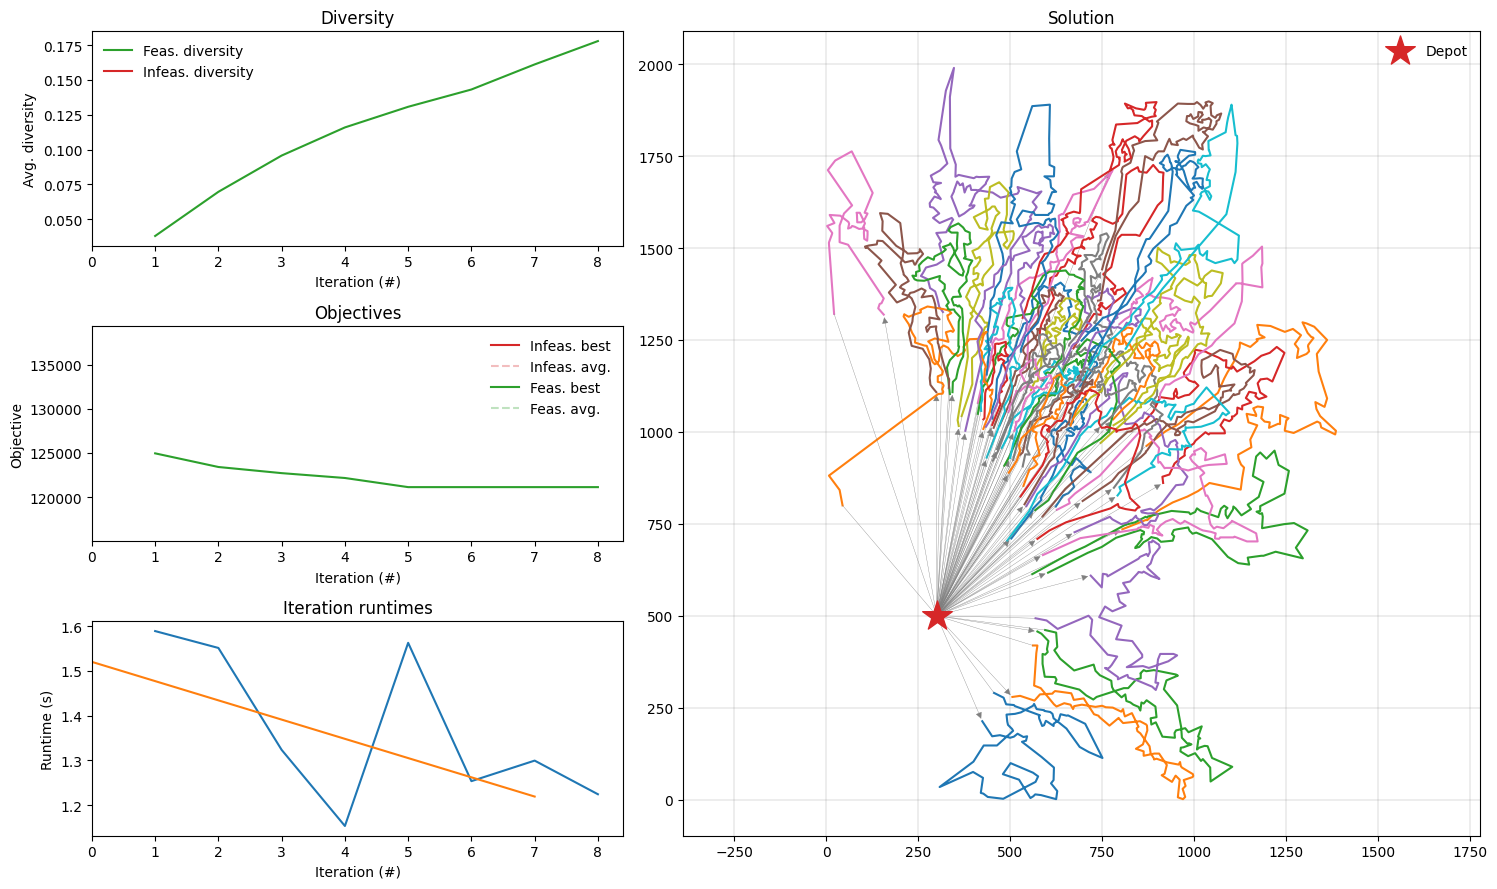

In [9]:
gap = 100 * (result.cost() - benchmark) / benchmark
print(f"Found a solution with cost: {result.cost()}.")
print(f"This is {gap:.1f}% worse than the best known", end=" ")
print(f"solution, which is {benchmark}.")

fig = plt.figure(figsize=(15, 9))
plot_result(result, instance, fig)
fig.tight_layout()

# Intensification only

In [10]:
name, const_heuristic, intensify, diversify = configs[1]
result = run_config(const_heuristic, intensify, diversify, seed, time_limit)
print(result)

Solution results
    # routes: 48
     # trips: 48
   # clients: 4000
   objective: 121964
    distance: 121964
    duration: 121964
# iterations: 11
    run-time: 10.05 seconds

Routes
------
Route #1: 2906 539 2456 2288 2398 3698 2731 2012 3093 3705 1448 2550 1433 895 1324 1959 2708 1245 526 146 3855 3743 2468 3295 2387 1218 1979 3133 2505 2976 1314 2879 2453 48 2202 80 2116 1860 1130 2915 127 1052 2074 3297 2866 1600 542 2495 312 965 3032 3021 474 2873 3586 1917 1333 2844 1122 246 3674 1738 892 735 915 1798 1547 1969 2940 3447 3703 1598 2772 3126 3486 2888 3156 1966 81 440 3349 3302 3848 303 1395 1170 3696 1315 3044 650 752 1607 1820 2926
Route #2: 1781 1012 2435 3933 854 1462 1468 1098 3950 798 2397 1803 1061 3644 2686 3861 762 554 1916 940 950 3502 336 145 1014 1155 707 1538 702 2522 2855 3901 3651 128 384 1575 1522 3709 1569 3560 2555 2379 2271 2648 2176 2697 1502 1249 2789 3007 1901 1484 1639 532 99 3908 3098 2134 2280 3059 2188 3090 2229 1556 1158 1879 3841 2485 1704 3498 309 7

Found a solution with cost: 121964.
This is 9.5% worse than the best known solution, which is 111391.0.


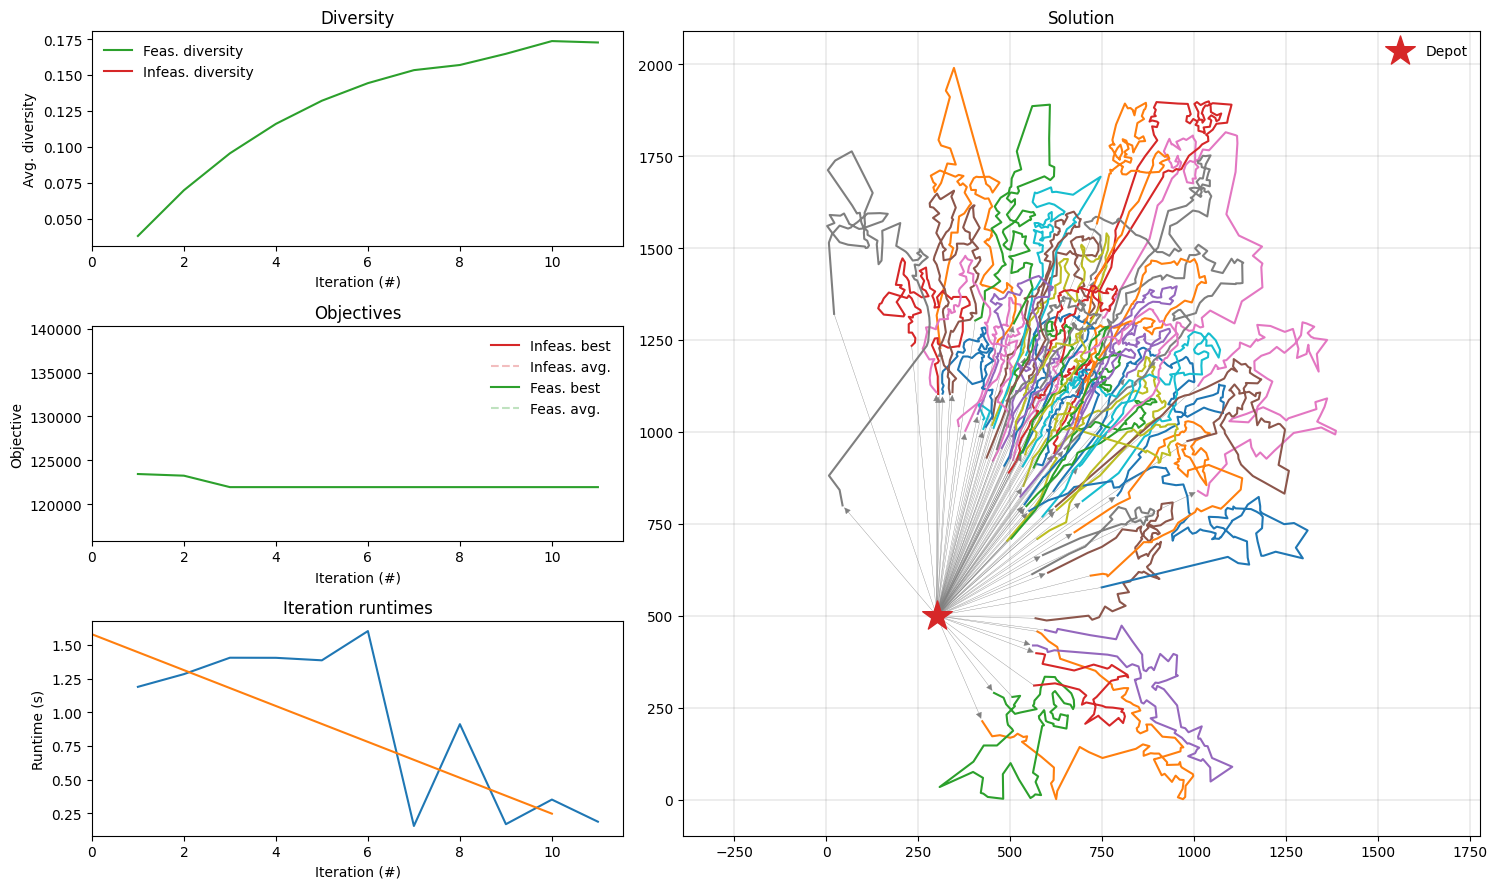

In [11]:
gap = 100 * (result.cost() - benchmark) / benchmark
print(f"Found a solution with cost: {result.cost()}.")
print(f"This is {gap:.1f}% worse than the best known", end=" ")
print(f"solution, which is {benchmark}.")

fig = plt.figure(figsize=(15, 9))
plot_result(result, instance, fig)
fig.tight_layout()

# Diversification only

In [12]:
name, const_heuristic, intensify, diversify = configs[2]
result = run_config(const_heuristic, intensify, diversify, seed, time_limit)
print(result)

Solution results
    # routes: 47
     # trips: 47
   # clients: 4000
   objective: 121830
    distance: 121830
    duration: 121830
# iterations: 19
    run-time: 10.04 seconds

Routes
------
Route #1: 3864 3168 3338 1033 2346 3619 3037 1025 177 154 530 2936 897 1189 1160 3816 2718 1947 3921 1368 1810 1446 163 2050 3672 3223 418 1350 2011 1013 31 3548 1823 459 3708 1733 1549 3909 3479 596 2984 1440 2721 1085 2293 2061 2700 1333 1917 3586 1918 1050 3409 2209 1519 3178 2185 2053 1132 105 218 3021 474 2873 1307 2755 1523 2844 1122 1738 2263 3441 76 1141 538 1482 3318 2381 129 3656 3918 1087 941 2382 552 2090 3031 2152 1540 2364 2991 208
Route #2: 2212 3171 3959 3273 3164 1260 1461 85 60 1214 2160 1417 1145 245 2979 881 1302 2560 3854 562 1239 2109 3540 3808 1131 1770 1883 1221 3927 1886 3874 1148 3419 3449 1283 565 2629 1526 2124 320 3681 1206 1336 1754 2286 152 2607 422 1816 670 3876 792 1309 359 3411 3980 51 291 1305 2052 3008 2009 1002 1261 106 1846 1143 2063 3834 3792 2825 2036 2595 

Found a solution with cost: 121830.
This is 9.4% worse than the best known solution, which is 111391.0.


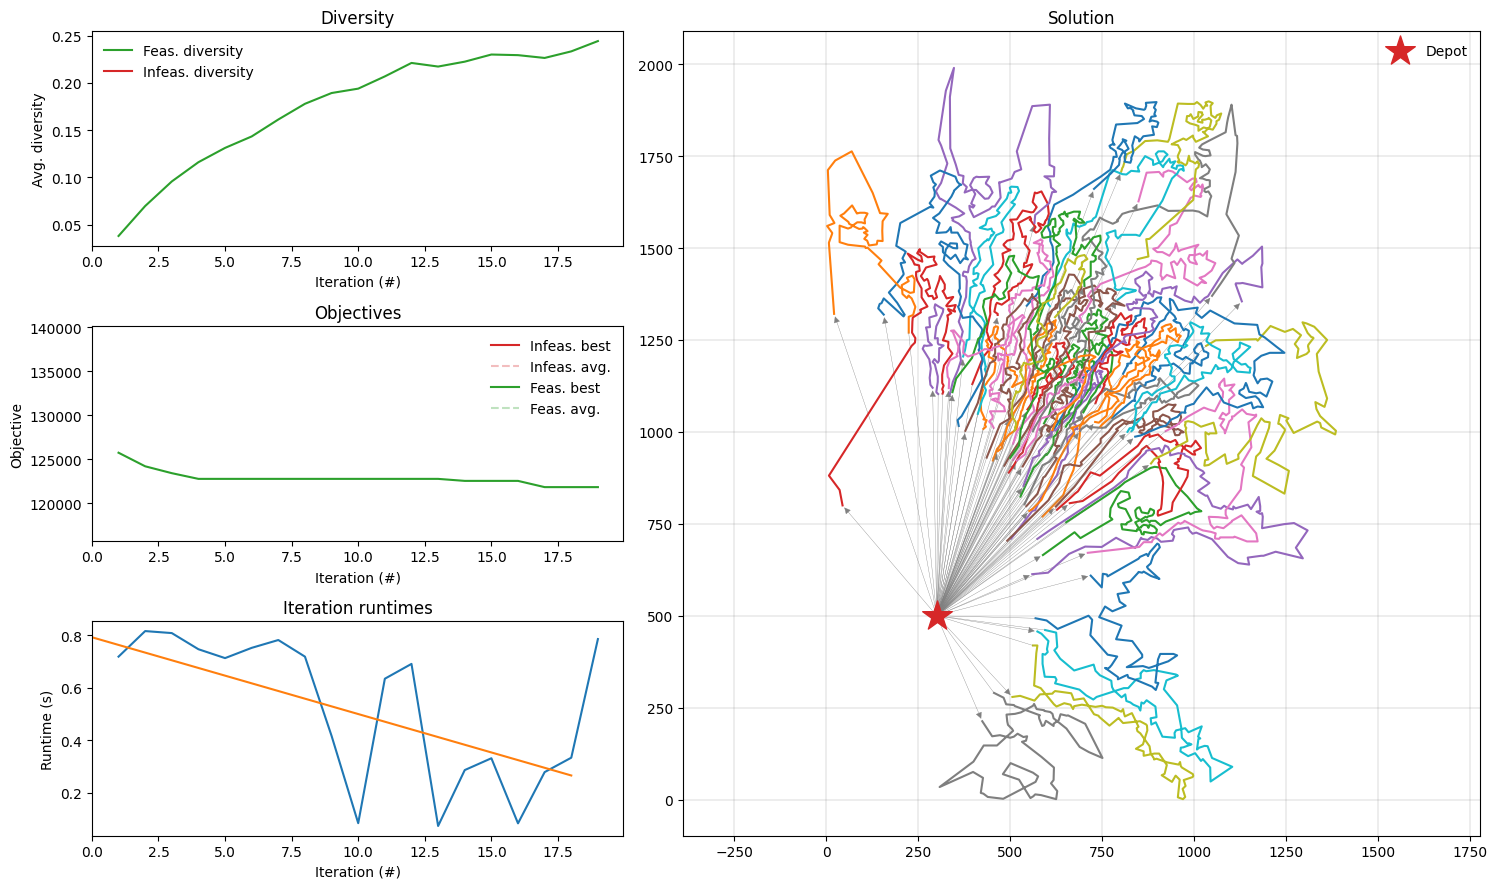

In [13]:
gap = 100 * (result.cost() - benchmark) / benchmark
print(f"Found a solution with cost: {result.cost()}.")
print(f"This is {gap:.1f}% worse than the best known", end=" ")
print(f"solution, which is {benchmark}.")

fig = plt.figure(figsize=(15, 9))
plot_result(result, instance, fig)
fig.tight_layout()

# No intensification and diversification

In [14]:
name, const_heuristic, intensify, diversify = configs[2]
result = run_config(const_heuristic, intensify, diversify, seed, time_limit)
print(result)

Solution results
    # routes: 47
     # trips: 47
   # clients: 4000
   objective: 121830
    distance: 121830
    duration: 121830
# iterations: 20
    run-time: 10.25 seconds

Routes
------
Route #1: 3864 3168 3338 1033 2346 3619 3037 1025 177 154 530 2936 897 1189 1160 3816 2718 1947 3921 1368 1810 1446 163 2050 3672 3223 418 1350 2011 1013 31 3548 1823 459 3708 1733 1549 3909 3479 596 2984 1440 2721 1085 2293 2061 2700 1333 1917 3586 1918 1050 3409 2209 1519 3178 2185 2053 1132 105 218 3021 474 2873 1307 2755 1523 2844 1122 1738 2263 3441 76 1141 538 1482 3318 2381 129 3656 3918 1087 941 2382 552 2090 3031 2152 1540 2364 2991 208
Route #2: 2212 3171 3959 3273 3164 1260 1461 85 60 1214 2160 1417 1145 245 2979 881 1302 2560 3854 562 1239 2109 3540 3808 1131 1770 1883 1221 3927 1886 3874 1148 3419 3449 1283 565 2629 1526 2124 320 3681 1206 1336 1754 2286 152 2607 422 1816 670 3876 792 1309 359 3411 3980 51 291 1305 2052 3008 2009 1002 1261 106 1846 1143 2063 3834 3792 2825 2036 2595 

Found a solution with cost: 121830.
This is 9.4% worse than the best known solution, which is 111391.0.


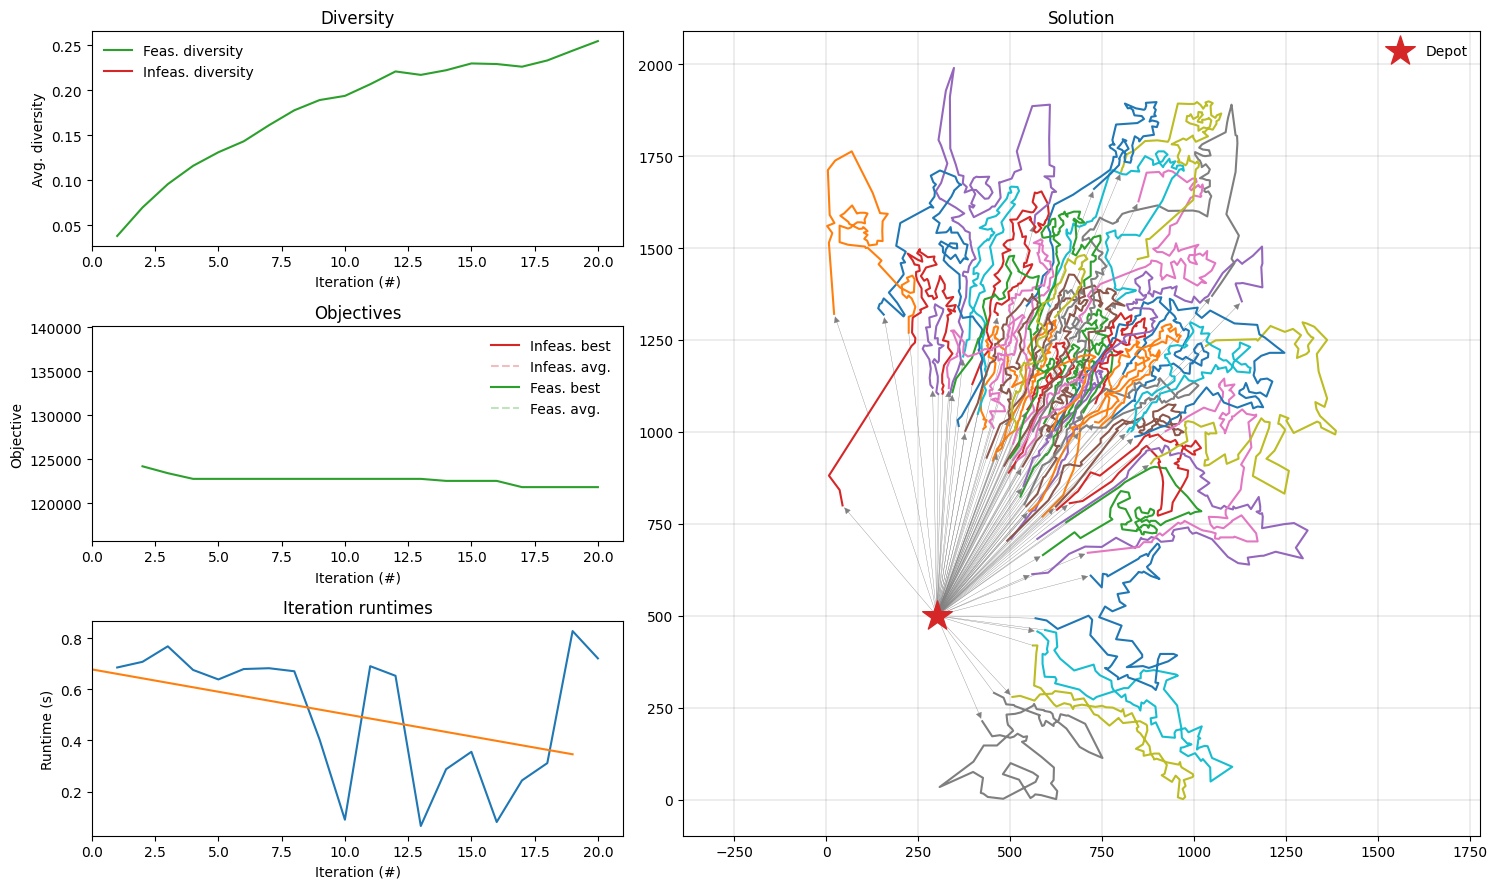

In [15]:
gap = 100 * (result.cost() - benchmark) / benchmark
print(f"Found a solution with cost: {result.cost()}.")
print(f"This is {gap:.1f}% worse than the best known", end=" ")
print(f"solution, which is {benchmark}.")

fig = plt.figure(figsize=(15, 9))
plot_result(result, instance, fig)
fig.tight_layout()